Definisco le funzioni per estrarre i dati necessari.

In [2]:

import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#os.chdir("C:\\Users\\Windows 10\\Desktop\\Stage\\python") #mio portatile
#os.chdir("Y:\\python\\Cluster\\barilaro\\python") #analisti1
os.chdir('\\\\salaanalisisrv\\ufficio_studi\\python\\Cluster\\barilaro\\python') #edp python

import data_management_def as data

In [47]:
dfpol=pd.read_csv('dfpol.csv',sep=';')
dfpol=dfpol.drop(['Unnamed: 0'],axis=1)

dfreturn=pd.read_csv('dfreturn.csv',sep=';')
dfreturn=dfreturn.drop(['Unnamed: 0'],axis=1)
variables_return=list(dfreturn.columns[6:])

anagrafica=["ana_name","ana_ticker","cat_descrizione","super_classe","classe"]


EXPLORATORY DATA ANALYSIS

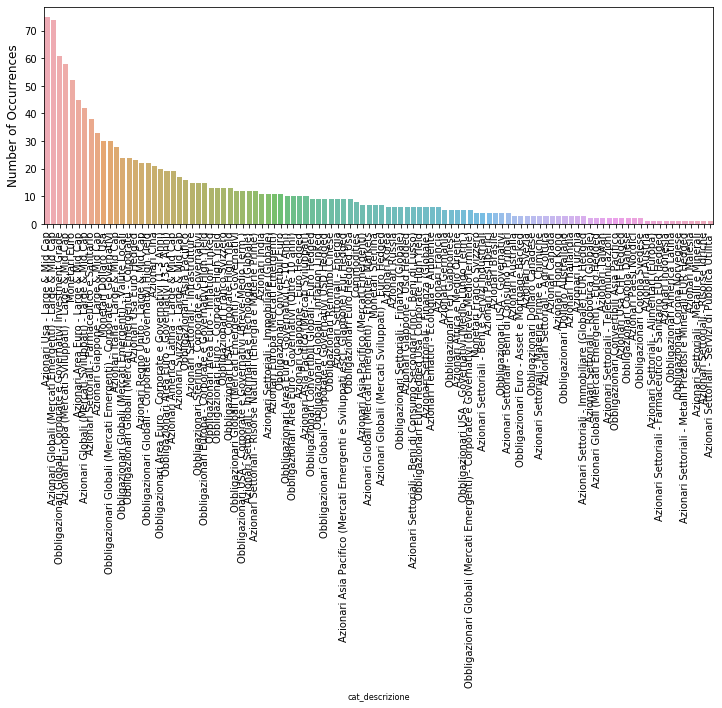

In [4]:
data.class_histogram(dfpol,'cat_descrizione')

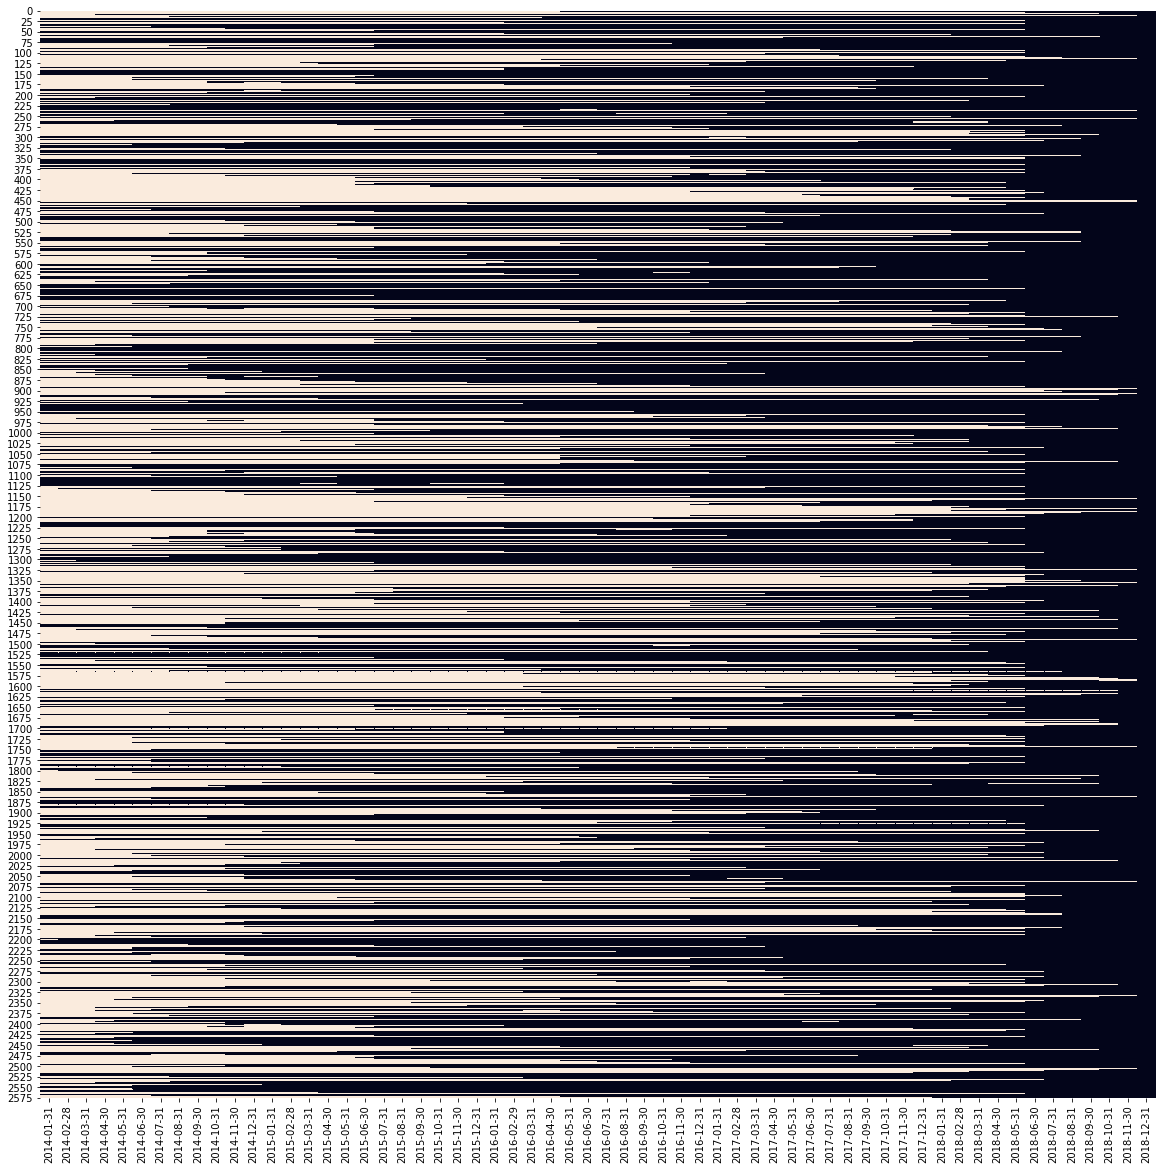

In [5]:
'''missing values'''

plt.figure(figsize=(20,20))
fig=sns.heatmap(dfreturn[variables_return].isnull(), cbar=False)
plt.show(fig)

In [6]:
data.no_NaN_rows(dfreturn[variables_return],0.5)

variables_return=variables_return[27:]
dfreturn=dfreturn[anagrafica+variables_return]


2015-07-31
0.5231124807395994
2015-08-31
0.5250385208012327
2015-09-30
0.5292758089368259
2015-10-31
0.5331278890600925
2015-11-30
0.5335130970724191
2015-12-31
0.539291217257319
2016-01-31
0.5446841294298922
2016-02-29
0.5597072419106317
2016-03-31
0.5681818181818182
2016-04-30
0.5755007704160247
2016-05-31
0.5893682588597843
2016-06-30
0.5959167950693375
2016-07-31
0.6055469953775039
2016-08-31
0.6086286594761171
2016-09-30
0.6105546995377504
2016-10-31
0.6101694915254238
2016-11-30
0.6163328197226502
2016-12-31
0.6448382126348228
2017-01-31
0.6567796610169492
2017-02-28
0.6621725731895224
2017-03-31
0.6710323574730355
2017-04-30
0.6879815100154083
2017-05-31
0.6949152542372882
2017-06-30
0.7006933744221879
2017-07-31
0.7126348228043143
2017-08-31
0.7207241910631741
2017-09-30
0.7291987673343605
2017-10-31
0.7426810477657936
2017-11-30
0.7492295839753467
2017-12-31
0.7573189522342064
2018-01-31
0.7750385208012327
2018-02-28
0.7900616332819723
2018-03-31
0.811633281972265
2018-04-30
0

['2016-04-30',
 '2016-05-31',
 '2016-06-30',
 '2016-07-31',
 '2016-08-31',
 '2016-09-30',
 '2016-10-31',
 '2016-11-30',
 '2016-12-31',
 '2017-01-31',
 '2017-02-28',
 '2017-03-31',
 '2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31']

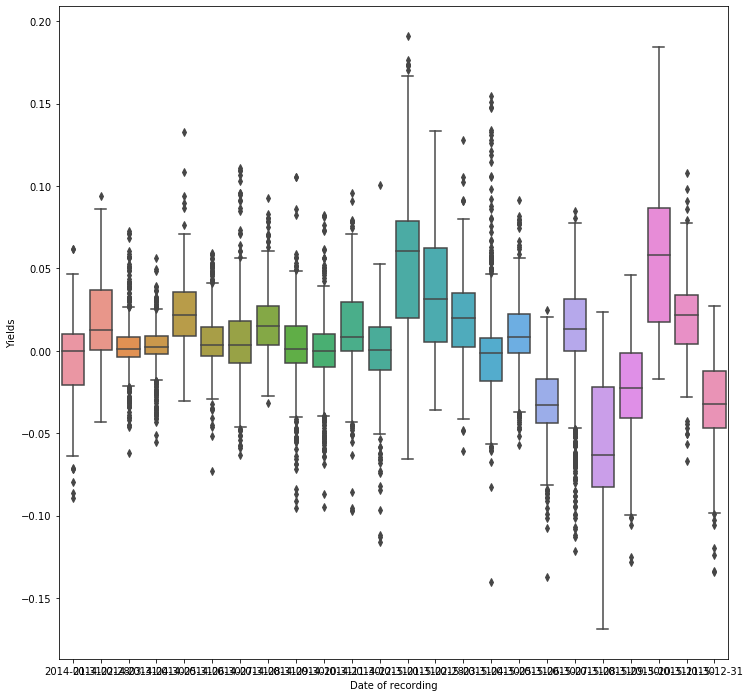

In [20]:
'''boxplot per rendimenti'''
plt.figure(figsize=(12,12))
fig=sns.boxplot(data=dfreturn[dfreturn.columns[6:30]]).set(ylabel="daily yields")
plt.xlabel("Date of recording")
plt.ylabel("Yields")
plt.show(fig)


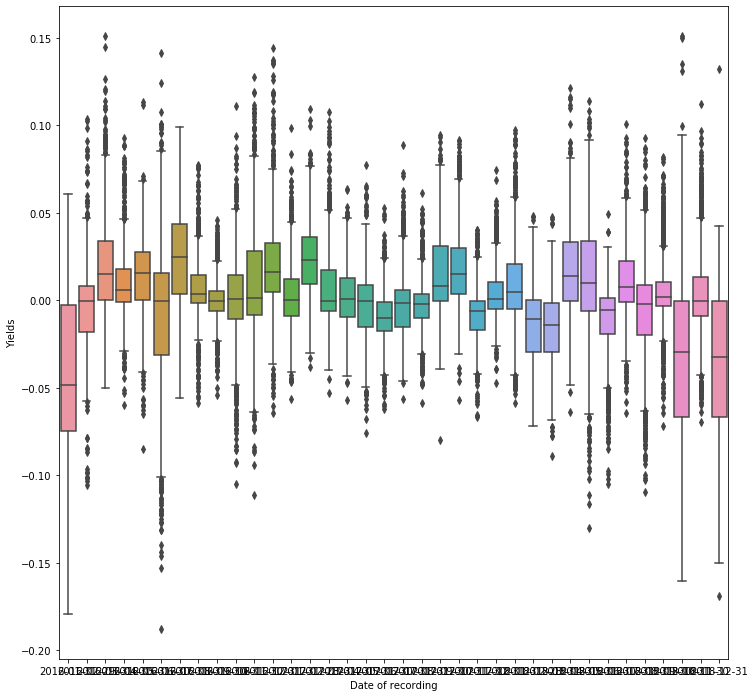

In [21]:
plt.figure(figsize=(12,12))
fig=sns.boxplot(data=dfreturn[dfreturn.columns[30:]]).set(ylabel="daily yields")
plt.xlabel("Date of recording")
plt.ylabel("Yields")
plt.show(fig)


In [19]:
Q1 = dfreturn[variables_return].quantile(0.1)
Q3 = dfreturn[variables_return].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

'''elimino outliers'''
dfreturn = dfreturn[~((dfreturn[variables_return] < (Q1 - 1.5 * IQR)) |(dfreturn[variables_return] > (Q3 + 1.5 * IQR))).any(axis=1)]
dfreturn.shape


2014-01-31    0.066402
2014-02-28    0.061549
2014-03-31    0.040561
2014-04-30    0.031595
2014-05-31    0.053104
2014-06-30    0.042528
2014-07-31    0.066595
2014-08-31    0.047428
2014-09-30    0.065665
2014-10-31    0.056638
2014-11-30    0.057536
2014-12-31    0.059541
2015-01-31    0.097762
2015-02-28    0.077111
2015-03-31    0.054103
2015-04-30    0.078992
2015-05-31    0.053347
2015-06-30    0.055663
2015-07-31    0.089747
2015-08-31    0.100828
2015-09-30    0.066907
2015-10-31    0.105766
2015-11-30    0.045648
2015-12-31    0.060708
2016-01-31    0.098513
2016-02-29    0.057237
2016-03-31    0.086037
2016-04-30    0.042668
2016-05-31    0.050638
2016-06-30    0.109031
2016-07-31    0.060045
2016-08-31    0.036944
2016-09-30    0.031600
2016-10-31    0.059575
2016-11-30    0.083724
2016-12-31    0.058165
2017-01-31    0.050761
2017-02-28    0.052012
2017-03-31    0.048543
2017-04-30    0.044022
2017-05-31    0.047991
2017-06-30    0.033971
2017-07-31    0.047905
2017-08-31 

(2458, 66)

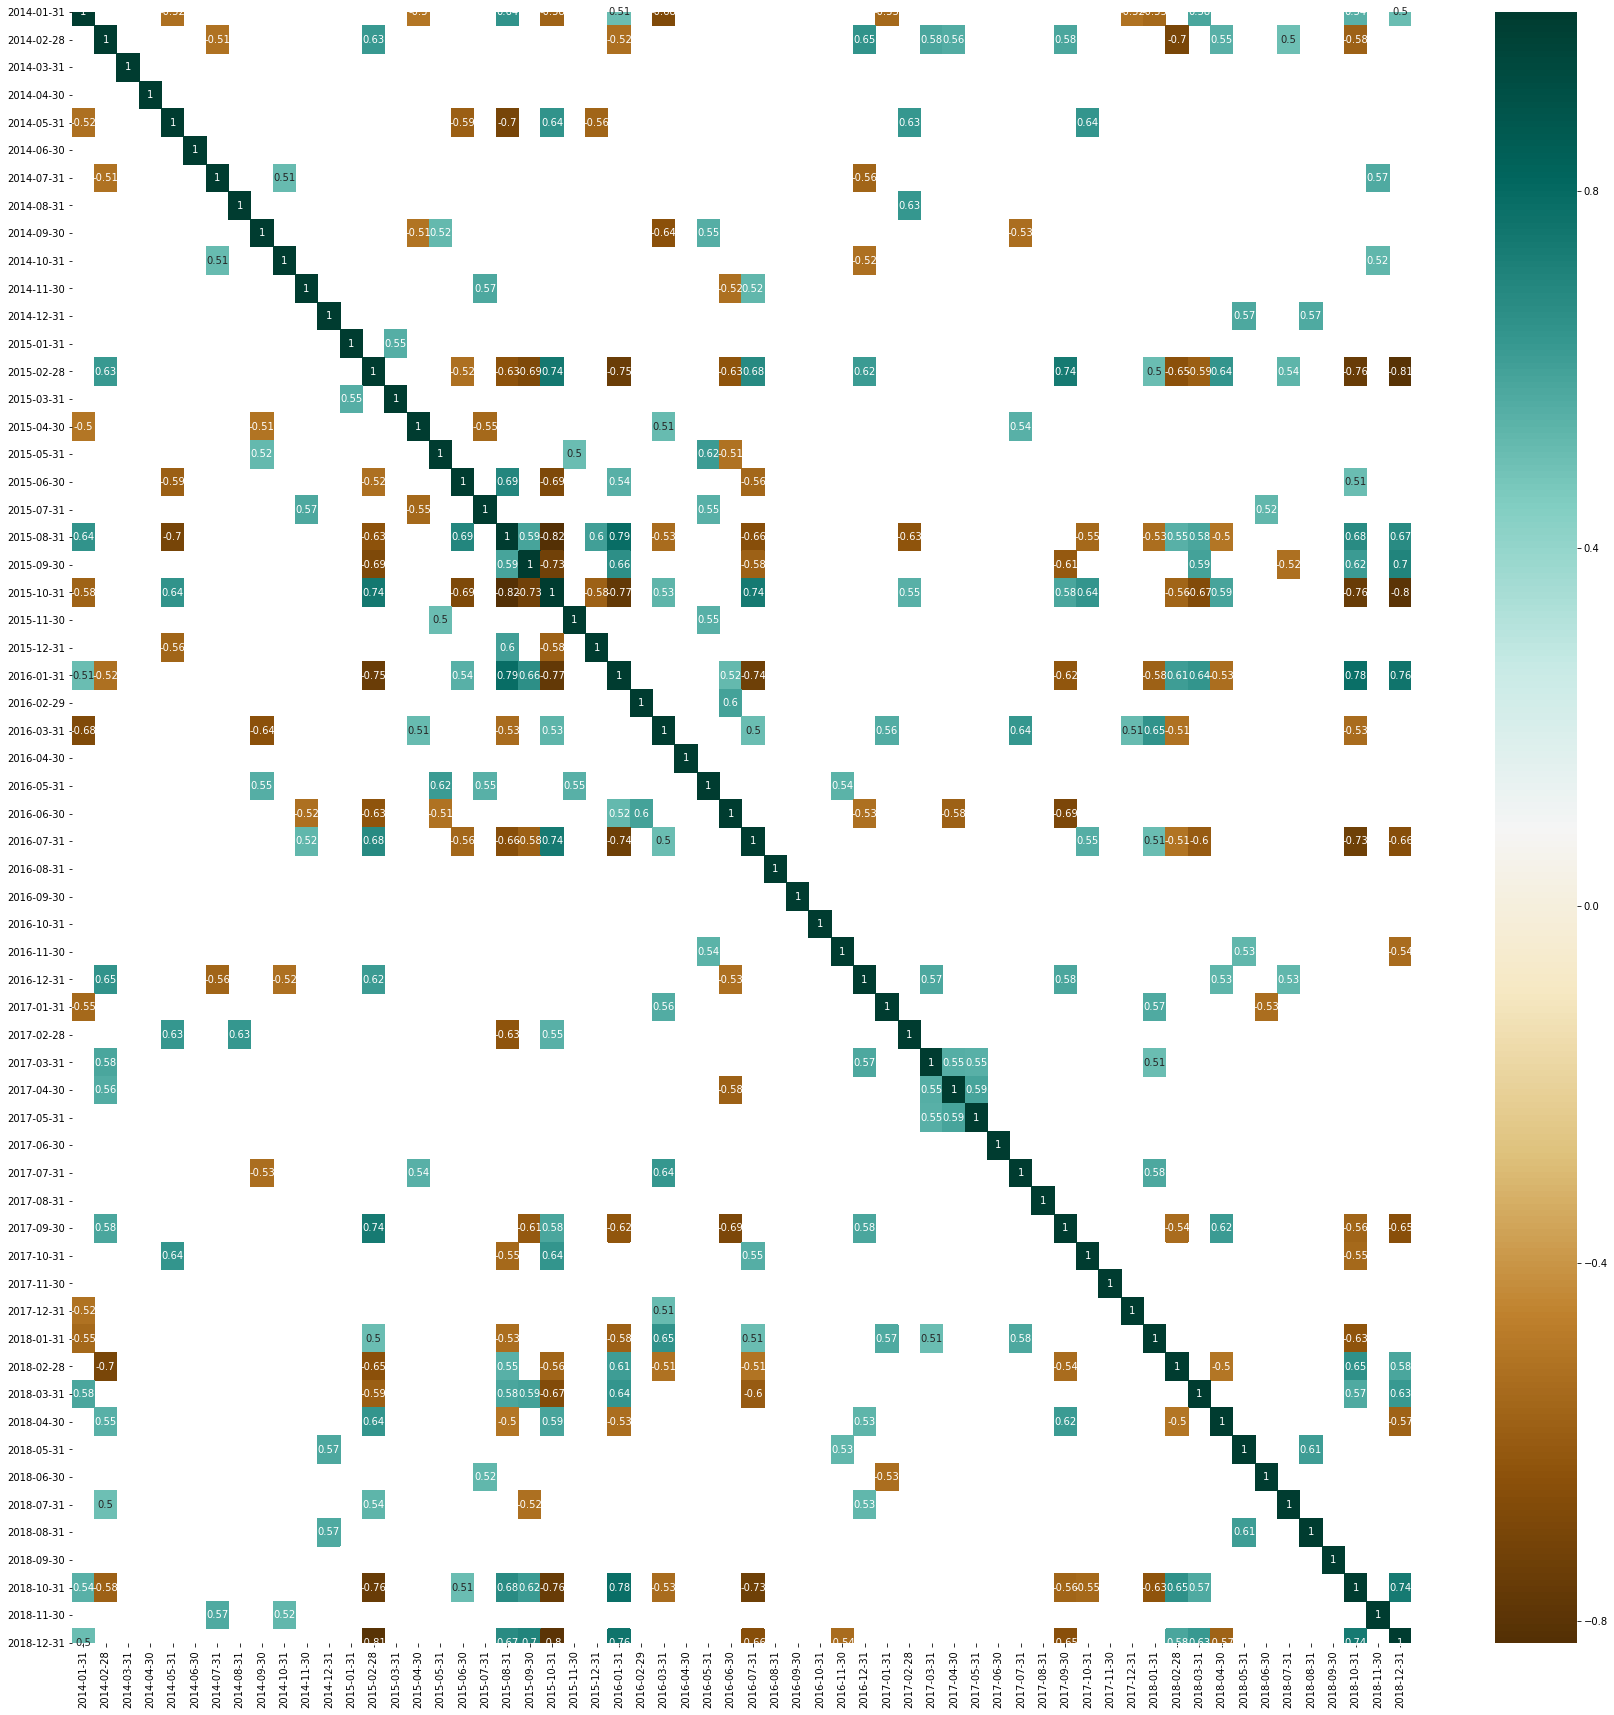

In [22]:
'''heatmap'''
plt.figure(figsize=(30,30))
c= dfreturn[variables_return].corr()
sns.heatmap(c[(c >= 0.5) | (c <= -0.5)],cmap="BrBG",annot=True)


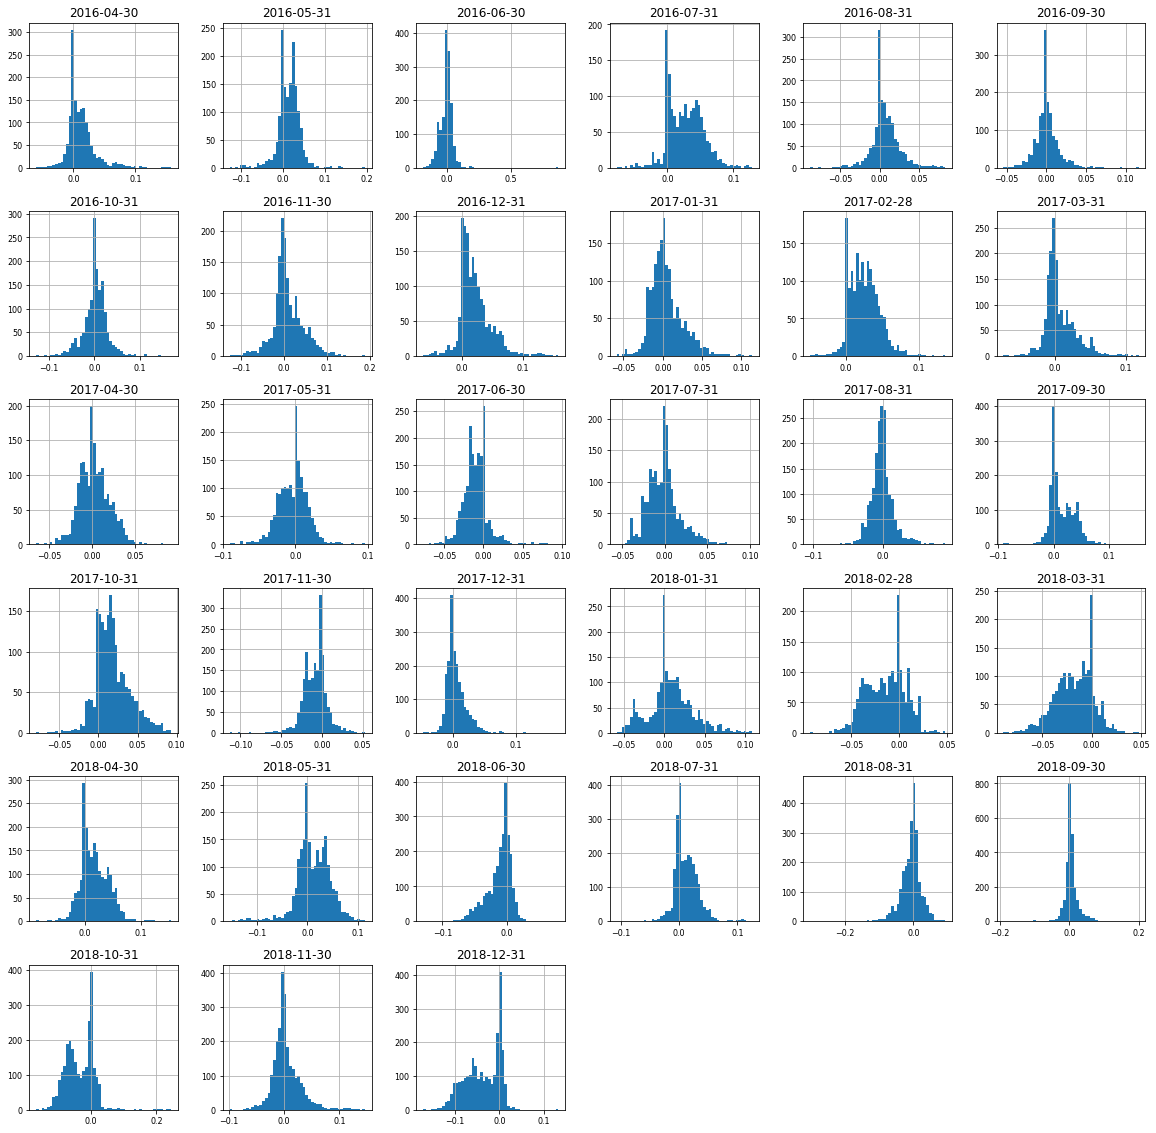

In [10]:
'''histograms'''
dfreturn[variables_return].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [ ]:
'''seleziono solo i fondi in comune tra i due dataframe'''

testdf=dfreturn.merge(dfpol,left_on='ana_ticker',right_on='ana_ticker')
dfpol=testdf.drop(columns=testdf.columns[6:71])
dfpol=dfpol.rename(columns={'ana_name_x':'ana_name','cat_descrizione_x':'cat_descrizione','super_classe_x':'super_classe',"classe_x":"classe",'code_x':'code'})
dfreturn=testdf.drop(columns=testdf.columns[66:73])
dfreturn=dfreturn.rename(columns={'ana_name_x':'ana_name','cat_descrizione_x':'cat_descrizione','super_classe_x':'super_classe',"classe_x":"classe",'code_x':'code'})


Funzioni per la vettorizzazione del testo

In [10]:
import text_vectorizer_def as text

from nltk.corpus import stopwords

'''stopwords in inglese'''
stopwords=stopwords.words('english')

In [ ]:
'''normalizzo i testi'''
normal=text.text_normalizer(dfpol['traduzione'],stopwords)

In [66]:
'''usando bag of words/tfidf'''
X,nomi=text.text_vectorizer(normal,method='tfidf',start=0,end=-1)

'''creo il dataframe con i vettori numerici ottenuti dalle parole'''
X=pd.DataFrame(X,index=dfpol['ana_ticker'],columns=nomi)

nomi

['aa',
 'aaa',
 'aad',
 'aaddit',
 'aaleverage',
 'aany',
 'ab',
 'abbb',
 'abl',
 'about',
 'above',
 'abs',
 'absolv',
 'ac',
 'academ',
 'acc',
 'acceiv',
 'accent',
 'access',
 'accessory',
 'accommod',
 'accompany',
 'accord',
 'account',
 'accru',
 'accum',
 'achiev',
 'achieve',
 'achieveth',
 'acquir',
 'acquisit',
 'across',
 'act',
 'actions',
 'actively',
 'activities',
 'actu',
 'acw',
 'ad',
 'adapt',
 'aday',
 'addit',
 'adequ',
 'adesclud',
 'adh',
 'adivers',
 'adjust',
 'adjusted',
 'admin',
 'admit',
 'admitted',
 'adopt',
 'adr',
 'adult',
 'adv',
 'advanced',
 'advers',
 'af',
 'affect',
 'affordable',
 'affy',
 'afr',
 'afric',
 'africa',
 'ag',
 'aggreg',
 'aggress',
 'agr',
 'agree',
 'agricult',
 'ai',
 'aif',
 'aim',
 'airport',
 'al',
 'alban',
 'alcohol',
 'alempi',
 'algorithm',
 'align',
 'all',
 'allo',
 'alloc',
 'allocation',
 'allow',
 'allowed',
 'almost',
 'alpenbank',
 'alph',
 'already',
 'also',
 'altern',
 'although',
 'altrioicr',
 'altrioicvm',


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 100 features
accuracy score: 38.24%
Validation result for 200 features
accuracy score: 42.65%
Validation result for 300 features
accuracy score: 45.59%
Validation result for 400 features
accuracy score: 48.53%
Validation result for 500 features
accuracy score: 51.47%
Validation result for 600 features
accuracy score: 54.41%
Validation result for 700 features
accuracy score: 52.94%
Validation result for 800 features
accuracy score: 51.47%
Validation result for 900 features
accuracy score: 51.47%
Validation result for 1000 features
accuracy score: 51.47%
Validation result for 1100 features
accuracy score: 51.47%
Validation result for 1200 featur

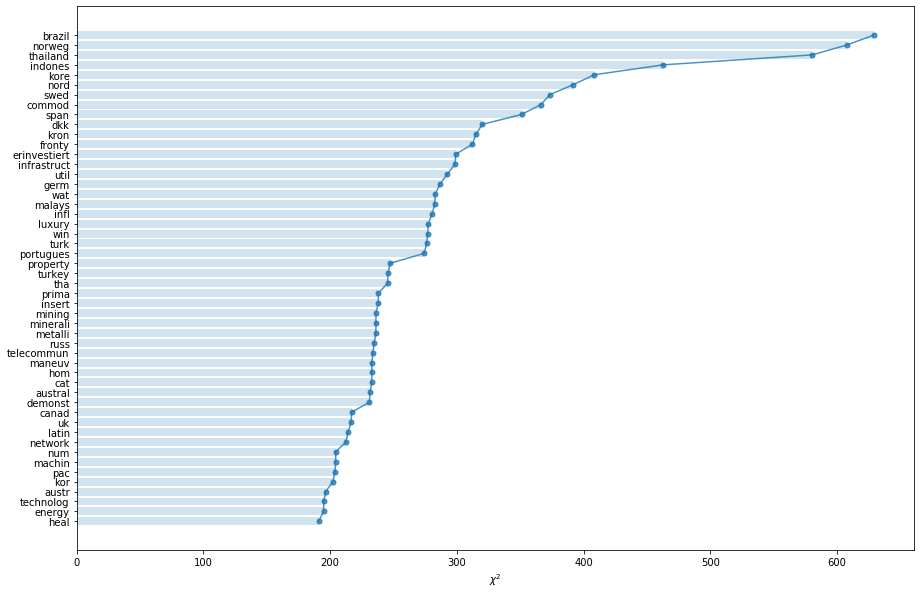

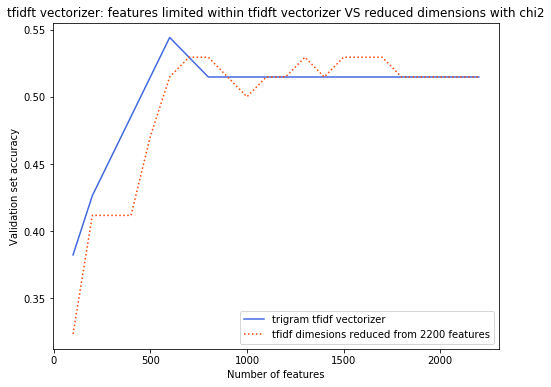

In [9]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

label='cat_descrizione'

normal=pd.DataFrame(normal,index=dfpol['ana_ticker'])
dfpol2=dfpol.merge(normal, left_on='ana_ticker',right_on=normal.index)
testdf=dfpol2[['ana_ticker','cat_descrizione',0]]

X=testdf[0]
y=testdf['cat_descrizione']

X_train,X_test_val,y_train,y_test_val = train_test_split(X, y, test_size=.1,random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=.5,random_state=12)


vec=text.TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(100,2300,100)


'''limiting the number of features using tfidf max features'''

feature_result_tgt = text.nfeature_accuracy_checker(vec, lr,n_features, stopwords,X_train, y_train, X_val, y_val)
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy'])

'''limiting the number of features using chi2'''

X_train_tfidf = vec.fit_transform(X_train)
X_val_tfidf=vec.transform(X_val)

chi2score = chi2(X_train_tfidf, y_train)[0]
chi2score[np.isnan(chi2score)]=0

'''top chi2 scores'''
text.plot_top_chi2scores(vec.get_feature_names(),chi2score)

ch2_result = []
for n in np.arange(100,2300,100):
    ch2 = SelectKBest(chi2, k=n)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, y_train)
    X_val_chi2_selected = ch2.transform(X_val_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, y_train)
    score = clf.score(X_val_chi2_selected, y_val)
    ch2_result.append(score)

'''comparison plot of limiting the features in both ways'''
text.plot_comparison(nfeatures_plot_tgt.nfeatures,nfeatures_plot_tgt.validation_accuracy,ch2_result)

del dfpol2,testdf,X,y,X_train,X_test,ch2,ch2_result,chi2score,X_train_tfidf,X_val_tfidf

dataframe alternativi: dati da utilizzare

In [67]:
'''opzione a: dataframe con solo parole'''
dfpol2=dfpol.merge(X, left_on='ana_ticker',right_on=X.index)
dfpol2=dfpol2.rename(columns={"classe_x":"classe",'code_x':'code'})
variables_pol=nomi
df_pol=dfpol2

In [48]:
'''opzione b: dataframe con solo rendimenti'''
df_return=dfreturn
variables_return=list(df_return.columns[6:])

In [12]:
'''opzione c:dataframe con parole e rendimenti'''
df_mixed=dfreturn.merge(X,left_on='ana_ticker',right_on=X.index)
df_mixed=df_mixed.rename(columns={"classe_x":"classe",'code_x':'code'})
variables_pol=nomi
variables_return=list(dfreturn.columns[6:])
variables_mixed=variables_return+variables_pol

In [ ]:
'''Opzionale: seleziono solo le categorie che hanno almeno X fondi'''
'''le categorie scartate le metto inuna unica di chiusura'''
'''valutare se l'accorpamento ex post non si apiù efficace, considerando il fatto che l'algoritmo valuta la vicinanza e una categoria con molta vairanza ha poche chance di essere quindi scelta'''

newdf,anagrafica=data.class_size_threshold(df_return,anagrafica,variables_return,'cat_descrizione',10)

In [ ]:
'''Opzionale: sostituisco le medie ai dati mancanti'''
df_return=data.mean_inputation(df_return,variables_return,'cat_descrizione')
df_mixed=data.mean_inputation(df_mixed,variables_mixed,'cat_descrizione')

In [ ]:
'''Opzionale: standardizzazione in Normale standard delle variabili'''
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_return[variables_return]=scaler.fit_transform(df_return[variables_return])

Funzioni per la classificazione

In [24]:

from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import supervised_learning_def as supervised
import unsupervised_learning_def as unsupervised

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Definisco training e test set e assegno valori medi a osservazioni con dati mancanti.

In [50]:
label='cat_descrizione'
train_size=0.9

X_train,y_train,X_test,y_test=supervised.prepare_inputs(df_return,anagrafica,variables_return,label,train_size,'mean',False)

#print(y_train['cat_descrizione'].nunique(),testdf['cat_descrizione'].nunique())

aggiungo fondi artificiali al training set simulando la presenza di costi di gestione

In [70]:
X_train,y_train=supervised.artificial_funds(X_train,y_train,[0.15,0.20])

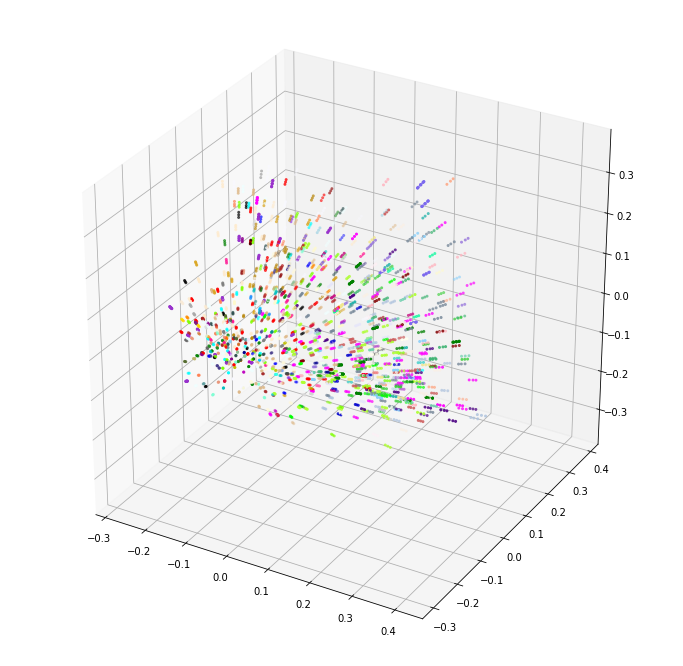

In [72]:
X_train2=pd.DataFrame(X_train, columns=variables_pol)
testdf2=y_train.join(X_train2)
del X_train2
unsupervised.PCA_plot(testdf2,variables_pol,3)

In [ ]:
'''seguono metodi di oversampling effettuati sul training set'''

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
os = ADASYN(n_neighbors=3)
X_train, y_train=os.fit_sample(X_train, y_train["cat_descrizione"])
y_train=y_train[:,np.newaxis]

In [ ]:
os = BorderlineSMOTE(k_neighbors=2)
X_train, y_train=os.fit_sample(X_train, y_train["cat_descrizione"])
y_train=y_train[:,np.newaxis]

In [ ]:
os = SMOTE(k_neighbors=2)
X_train, y_train=os.fit_sample(X_train, y_train["cat_descrizione"])
y_train=y_train[:,np.newaxis]

In [ ]:
ros = RandomOverSampler()
X_train, y_train= ros.fit_resample(X_train, y_train["cat_descrizione"])

In [ ]:
'''plot the result of the oversampling'''

LE = LabelEncoder()
y_train2=pd.DataFrame(y_train,columns=['cat_descrizione'])
y_train2['code'] = LE.fit_transform(y_train2['cat_descrizione'])
X_train2=pd.DataFrame(X_train, columns=variables)
testdf2=y_train2.join(X_train2)
del X_train2
unsupervised.PCA_plot(testdf2,variables,3)

In [73]:
supervised.data_summary(X_train, y_train, X_test, y_test)  

Train images shape: (3690, 2377)
Train labels shape: (3690, 5)
Test images shape: (137, 2377)
Test labels shape: (137, 5)


Testo vari tipi di classifier con gridsearchCV

In [53]:
"""Regressione logistica"""
parameters={'solver':('newton-cg','lbfgs','sag','saga'),'C':(100,1000,2000,5000,6000),'multi_class':('ovr','multinomial')}

logreg= LogisticRegression(max_iter=500,penalty='l2',solver='newton-cg',class_weight='balanced',multi_class='multinomial')


grid=GridSearchCV(logreg,parameters,cv=3,return_train_score=True)
grid=grid.fit(X_train,y_train[label])
clftest=pd.DataFrame(grid.cv_results_)
clf=grid.best_estimator_
clf.score(X_test,y_test[label])

print(clf,clf.score(X_test,y_test[label]))
#LogisticRegression(C=2000, class_weight='balanced', dual=False,fit_intercept=True, intercept_scaling=1, l1_ratio=None,max_iter=300, multi_class='warn', n_jobs=None, penalty='l2',random_state=None, solver='liblinear', tol=0.0001, verbose=0,warm_start=False) 0.7184466019417476

C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not c

C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\an

C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\python.EDP\AppData\Local\Co

LogisticRegression(C=2000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False) 0.8395061728395061


In [54]:
#clf= LogisticRegression(max_iter=500,C=2000,penalty='l2',class_weight='balanced',solver='lbfgs',multi_class='ovr')
clf=LogisticRegression(C=2000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)
clf.fit(X_train,y_train[label])
clf.score(X_test,y_test[label])

0.8395061728395061

In [70]:
"""Support vector machines"""
parameters={'degree':(list(np.arange(1,4))),'C':(1,200,500,1000),'gamma':(0.5,1,2,5,10)}
svm= SVC(kernel='linear',class_weight='balanced')
grid=GridSearchCV(svm,parameters,cv=3,return_train_score=True)
grid.fit(X_train, y_train[label])
svmtest=pd.DataFrame(grid.cv_results_)
svm=grid.best_estimator_

svm.score(X_test,y_test[label])
print(grid.best_estimator_,svm.score(X_test,y_test[label]))


C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.5, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.8518518518518519


In [63]:
svm= SVC(C=1000, class_weight='balanced', 
    decision_function_shape='ovr', degree=1, kernel='linear')
#svm=SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=1, gamma=10, kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
svm.fit(X_train,y_train[label])
svm.score(X_test,y_test[label])


0.8518518518518519

In [71]:
parameters={'kernel':('rbf','poly','sigmoid'),'degree':(list(np.arange(1,4))),'C':(1,200,500,1000),'gamma':(0.5,1,2,5,10)}
svm= SVC(class_weight='balanced')
grid=GridSearchCV(svm,parameters,cv=3,return_train_score=True)
grid.fit(X_train, y_train[label])
svmtest=pd.DataFrame(grid.cv_results_)
svm=grid.best_estimator_

svm.score(X_test,y_test[label])
print(grid.best_estimator_,svm.score(X_test,y_test[label]))


C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 0.8395061728395061


In [65]:
svm=SVC(C=1000, class_weight='balanced',
    decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf')
svm.fit(X_train,y_train[label])
svm.score(X_test,y_test[label])


0.8395061728395061

In [ ]:
"""Random Forest"""
parameters={'max_depth':(15,25,35,45),'n_estimators':(100,200,300),'criterion':('gini','entropy'),'min_samples_split':(2,3,4),'min_samples_leaf':(1,2,3,4)}
forest = RandomForestClassifier(class_weight='balanced')

grid=GridSearchCV(forest,parameters,cv=5,return_train_score=True)
grid=grid.fit(X_train,y_train[label])
foresttest=pd.DataFrame(grid.cv_results_)
forest= grid.best_estimator_

forest.score(X_test, y_test[label])
print(grid.best_estimator_,forest.score(X_test, y_test[label]))
#RandomForestClassifier(bootstrap=True, class_weight='balanced',criterion='entropy', max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=2,min_samples_split=3, min_weight_fraction_leaf=0.0,n_estimators=200, n_jobs=None, oob_score=False,random_state=None, verbose=0, warm_start=False) 0.7766990291262136

C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [73]:
#forest=RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy',min_samples_leaf=2, min_samples_split= 4, n_estimators= 200)
forest=RandomForestClassifier(bootstrap=True, class_weight='balanced',criterion='entropy', max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=2,min_samples_split=3, min_weight_fraction_leaf=0.0,n_estimators=200, n_jobs=None, oob_score=False,random_state=None, verbose=0, warm_start=False)
forest.fit(X_train,y_train[label])
forest.score(X_test,y_test[label])

0.7530864197530864

In [ ]:
"""Decision tree"""
parameters={'max_depth':(15,25,35,45),'criterion':('gini','entropy'),'min_samples_split':(2,3,4),'min_samples_leaf':(1,2,3,4)}

tree = DecisionTreeClassifier(class_weight='balanced')

grid=GridSearchCV(tree,parameters,cv=3,return_train_score=True)
grid=grid.fit(X_train,y_train[label])
treetest1=pd.DataFrame(grid.cv_results_)
tree=grid.best_estimator_

tree.score(X_test,y_test[label])
print(grid.best_estimator_,tree.score(X_test,y_test[label]))

In [75]:
"""K-nearest neighbors"""
parameters={'n_neighbors':(2,5,10,20),'weights':('uniform','distance'),'algorithm':('ball_tree','kd_tree','brute')}

knn = KNeighborsClassifier()
grid=GridSearchCV(knn,parameters,cv=3,return_train_score=True)
grid=grid.fit(X_train,y_train[label])
knntest=pd.DataFrame(grid.cv_results_)
knn=grid.best_estimator_


print(grid.best_estimator_,knn.score(X_test, y_test[label]))

C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance') 0.8148148148148148


C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
knn=KNeighborsClassifier(n_neighbors=2,weights='distance')
knn.fit(X_train,y_train[label])
knn.score(X_test,y_test[label])

0.8148148148148148

In [77]:
'''Naive Bayes classifier'''
gnb = GaussianNB()
gnb.fit(X_train, y_train[label])
gnb.score(X_test, y_test[label])


0.691358024691358

In [78]:
"""Linear discriminant analysis"""
parameters={'solver':('svd','lsqr','eigen')}

lda = LinearDiscriminantAnalysis()
grid=GridSearchCV(lda,parameters,cv=3,return_train_score=True)
grid=grid.fit(X_train,y_train[label])
ldatest=pd.DataFrame(grid.cv_results_)

lda=grid.best_estimator_
lda.score(X_test, y_test[label])
print(grid.best_estimator_,lda.score(X_test, y_test[label]))

C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001) 0.7777777777777778


C:\Users\python.EDP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\covariance\empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [79]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train[label])
lda.score(X_test,y_test[label])

0.7777777777777778

In [ ]:
#classifier=SVC(kernel='linear',class_weight=None, C=4000)
classifier1=LogisticRegression(C=700, class_weight='balanced',max_iter=500, multi_class='ovr', penalty='l2', solver='newton-cg')
classifier2=KNeighborsClassifier(n_neighbors=2,weights='distance')

#classifier= LogisticRegression(max_iter=500,C=2000,penalty='l2',class_weight='balanced',solver='lbfgs',multi_class='ovr')
#classifier=RandomForestClassifier(class_weight= 'balanced', criterion= 'entropy',min_samples_leaf=2, min_samples_split= 4, n_estimators= 200)
#classifier=RandomForestClassifier(class_weight= 'balanced')

#classifier=KNeighborsClassifier(n_neighbors=2,weights='distance')
#classifier = LinearDiscriminantAnalysis()

intersection,score=intersection_classification(classifier1,classifier2,df_mixed,anagrafica,variables_pol,variables_return,label='cat_descrizione')
score

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train['code'] = LE.fit_transform(y_train['cat_descrizione'])
y_test['code'] = LE.fit_transform(y_test['cat_descrizione'])


In [43]:
X_train=np.array(X_train,dtype=float)
y_train=np.array(y_train["code"].values)
y_train=y_train.astype(int)
X_test=np.array(X_test,dtype=float)
y_test=np.array(y_test["code"].values)
y_test=y_test.astype(int)
    
#supervised.data_summary(X_train, y_train, X_test, y_test)   
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import MaxNorm
from keras.layers import Dropout


Using TensorFlow backend.


In [45]:
np.unique(y_train)
k=110

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109])

In [46]:

model = Sequential()
#model.add(Dense(200, activation='relu'))
#model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))

model.add(Dense(k, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=500,batch_size=10)

model.evaluate(X_test,  y_test, verbose=2)


Epoch 1/500
2212/2212 [==============================] - 0s 168us/step - loss: 4.2568 - accuracy: 0.1388
Epoch 2/500
2212/2212 [==============================] - 0s 115us/step - loss: 3.3907 - accuracy: 0.2432
Epoch 3/500
2212/2212 [==============================] - 0s 95us/step - loss: 2.8015 - accuracy: 0.3156
Epoch 4/500
2212/2212 [==============================] - 0s 101us/step - loss: 2.3897 - accuracy: 0.4218
Epoch 5/500
2212/2212 [==============================] - 0s 107us/step - loss: 2.0753 - accuracy: 0.4973
Epoch 6/500
2212/2212 [==============================] - 0s 128us/step - loss: 1.8361 - accuracy: 0.5687
Epoch 7/500
2212/2212 [==============================] - 0s 110us/step - loss: 1.6466 - accuracy: 0.6117
Epoch 8/500
2212/2212 [==============================] - 0s 108us/step - loss: 1.4933 - accuracy: 0.6447
Epoch 9/500
2212/2212 [==============================] - 0s 113us/step - loss: 1.3668 - accuracy: 0.6614
Epoch 10/500
2212/2212 [==============================] 

2212/2212 [==============================] - 0s 120us/step - loss: 0.2049 - accuracy: 0.9534
Epoch 79/500
2212/2212 [==============================] - 0s 100us/step - loss: 0.2050 - accuracy: 0.9521
Epoch 80/500
2212/2212 [==============================] - 0s 104us/step - loss: 0.2009 - accuracy: 0.9543
Epoch 81/500
2212/2212 [==============================] - 0s 122us/step - loss: 0.1984 - accuracy: 0.9543
Epoch 82/500
2212/2212 [==============================] - 0s 136us/step - loss: 0.1971 - accuracy: 0.9552
Epoch 83/500
2212/2212 [==============================] - 0s 113us/step - loss: 0.1931 - accuracy: 0.9543
Epoch 84/500
2212/2212 [==============================] - 0s 113us/step - loss: 0.1905 - accuracy: 0.9561
Epoch 85/500
2212/2212 [==============================] - 0s 114us/step - loss: 0.1895 - accuracy: 0.9566
Epoch 86/500
2212/2212 [==============================] - 0s 106us/step - loss: 0.1860 - accuracy: 0.9584
Epoch 87/500
2212/2212 [==============================] - 0

2212/2212 [==============================] - 0s 102us/step - loss: 0.0992 - accuracy: 0.9742
Epoch 156/500
2212/2212 [==============================] - 0s 98us/step - loss: 0.0976 - accuracy: 0.9765
Epoch 157/500
2212/2212 [==============================] - 0s 110us/step - loss: 0.0985 - accuracy: 0.9765
Epoch 158/500
2212/2212 [==============================] - 0s 108us/step - loss: 0.0961 - accuracy: 0.9742
Epoch 159/500
2212/2212 [==============================] - 0s 98us/step - loss: 0.0958 - accuracy: 0.9765
Epoch 160/500
2212/2212 [==============================] - 0s 101us/step - loss: 0.0934 - accuracy: 0.9778
Epoch 161/500
2212/2212 [==============================] - 0s 93us/step - loss: 0.0944 - accuracy: 0.9769
Epoch 162/500
2212/2212 [==============================] - 0s 105us/step - loss: 0.0954 - accuracy: 0.9756
Epoch 163/500
2212/2212 [==============================] - 0s 96us/step - loss: 0.0920 - accuracy: 0.9769
Epoch 164/500
2212/2212 [==============================

2212/2212 [==============================] - 0s 106us/step - loss: 0.0601 - accuracy: 0.9869
Epoch 232/500
2212/2212 [==============================] - 0s 101us/step - loss: 0.0611 - accuracy: 0.9828
Epoch 233/500
2212/2212 [==============================] - 0s 106us/step - loss: 0.0610 - accuracy: 0.9833
Epoch 234/500
2212/2212 [==============================] - 0s 112us/step - loss: 0.0607 - accuracy: 0.9837
Epoch 235/500
2212/2212 [==============================] - 0s 103us/step - loss: 0.0588 - accuracy: 0.9855
Epoch 236/500
2212/2212 [==============================] - 0s 106us/step - loss: 0.0597 - accuracy: 0.9851
Epoch 237/500
2212/2212 [==============================] - 0s 108us/step - loss: 0.0577 - accuracy: 0.9842
Epoch 238/500
2212/2212 [==============================] - 0s 95us/step - loss: 0.0593 - accuracy: 0.9855
Epoch 239/500
2212/2212 [==============================] - 0s 99us/step - loss: 0.0584 - accuracy: 0.9864
Epoch 240/500
2212/2212 [============================

2212/2212 [==============================] - 0s 115us/step - loss: 0.0416 - accuracy: 0.9896
Epoch 308/500
2212/2212 [==============================] - 0s 129us/step - loss: 0.0413 - accuracy: 0.9910
Epoch 309/500
2212/2212 [==============================] - 0s 125us/step - loss: 0.0401 - accuracy: 0.9910
Epoch 310/500
2212/2212 [==============================] - 0s 126us/step - loss: 0.0409 - accuracy: 0.9910
Epoch 311/500
2212/2212 [==============================] - 0s 125us/step - loss: 0.0407 - accuracy: 0.9892
Epoch 312/500
2212/2212 [==============================] - 0s 137us/step - loss: 0.0398 - accuracy: 0.9905
Epoch 313/500
2212/2212 [==============================] - 0s 122us/step - loss: 0.0399 - accuracy: 0.9905
Epoch 314/500
2212/2212 [==============================] - 0s 111us/step - loss: 0.0400 - accuracy: 0.9914
Epoch 315/500
2212/2212 [==============================] - 0s 111us/step - loss: 0.0394 - accuracy: 0.9910
Epoch 316/500
2212/2212 [==========================

2212/2212 [==============================] - 0s 105us/step - loss: 0.0299 - accuracy: 0.9937
Epoch 384/500
2212/2212 [==============================] - 0s 112us/step - loss: 0.0295 - accuracy: 0.9923
Epoch 385/500
2212/2212 [==============================] - 0s 108us/step - loss: 0.0294 - accuracy: 0.9914
Epoch 386/500
2212/2212 [==============================] - 0s 112us/step - loss: 0.0284 - accuracy: 0.9941
Epoch 387/500
2212/2212 [==============================] - 0s 112us/step - loss: 0.0300 - accuracy: 0.9919
Epoch 388/500
2212/2212 [==============================] - 0s 113us/step - loss: 0.0292 - accuracy: 0.9919
Epoch 389/500
2212/2212 [==============================] - 0s 114us/step - loss: 0.0295 - accuracy: 0.9928
Epoch 390/500
2212/2212 [==============================] - 0s 126us/step - loss: 0.0287 - accuracy: 0.9928
Epoch 391/500
2212/2212 [==============================] - 0s 126us/step - loss: 0.0296 - accuracy: 0.9923
Epoch 392/500
2212/2212 [==========================

2212/2212 [==============================] - 0s 122us/step - loss: 0.0224 - accuracy: 0.9946
Epoch 460/500
2212/2212 [==============================] - 0s 128us/step - loss: 0.0229 - accuracy: 0.9941
Epoch 461/500
2212/2212 [==============================] - 0s 110us/step - loss: 0.0240 - accuracy: 0.9941
Epoch 462/500
2212/2212 [==============================] - 0s 113us/step - loss: 0.0230 - accuracy: 0.9946
Epoch 463/500
2212/2212 [==============================] - 0s 131us/step - loss: 0.0226 - accuracy: 0.9941
Epoch 464/500
2212/2212 [==============================] - 0s 140us/step - loss: 0.0226 - accuracy: 0.9937
Epoch 465/500
2212/2212 [==============================] - 0s 117us/step - loss: 0.0218 - accuracy: 0.9941
Epoch 466/500
2212/2212 [==============================] - 0s 108us/step - loss: 0.0229 - accuracy: 0.9941
Epoch 467/500
2212/2212 [==============================] - 0s 122us/step - loss: 0.0228 - accuracy: 0.9937
Epoch 468/500
2212/2212 [==========================

[51.663679226962, 0.0]

In [54]:
# Use scikit-learn to grid search the batch size and epochs

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu'))
    model.add(Dense(k, activation='sigmoid'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 80, 100,500]
epochs = [200,500,1000,5000]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train, y_train)
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#batch 10, epochs at 500


Best: 0.848773 using {'batch_size': 10, 'epochs': 500}
0.827395 (0.024358) with: {'batch_size': 10, 'epochs': 200}
0.848773 (0.015522) with: {'batch_size': 10, 'epochs': 500}
0.836896 (0.026716) with: {'batch_size': 10, 'epochs': 1000}
0.834521 (0.016857) with: {'batch_size': 10, 'epochs': 5000}
0.819477 (0.022766) with: {'batch_size': 20, 'epochs': 200}
0.838480 (0.019274) with: {'batch_size': 20, 'epochs': 500}
0.842439 (0.024606) with: {'batch_size': 20, 'epochs': 1000}
0.836896 (0.020519) with: {'batch_size': 20, 'epochs': 5000}
0.792557 (0.017303) with: {'batch_size': 40, 'epochs': 200}
0.830562 (0.023660) with: {'batch_size': 40, 'epochs': 500}
0.847189 (0.017468) with: {'batch_size': 40, 'epochs': 1000}
0.828979 (0.020254) with: {'batch_size': 40, 'epochs': 5000}
0.751386 (0.016610) with: {'batch_size': 80, 'epochs': 200}
0.817102 (0.028385) with: {'batch_size': 80, 'epochs': 500}
0.836105 (0.022482) with: {'batch_size': 80, 'epochs': 1000}
0.832146 (0.021360) with: {'batch_size

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
# Function to create model, required for KerasClassifier
def create_model(optimizer='Adam'):
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu'))
    model.add(Dense(k, activation='sigmoid'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#Nadam wins

In [ ]:
# Use scikit-learn to grid search the learning rate and momentum
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu'))
    model.add(Dense(k, activation='sigmoid'))

    
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer='Nadam')
    return model


model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#no great effect, high variability

In [ ]:
# Use scikit-learn to grid search the weight initialization
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(k, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#good ones: glorot uniform,he normal, he uniform

In [ ]:
# Use scikit-learn to grid search the activation function
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(50, kernel_initializer='uniform', activation=activation))
    model.add(Dense(k, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
#best: relu

In [ ]:
# Function to create model, required for KerasClassifier

def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(100, kernel_initializer='uniform', activation='relu', kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(k, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5,10,20,50]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#no dropout, weight 5

In [63]:


# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer='uniform', activation='relu', kernel_constraint=MaxNorm(4)))
    model.add(Dense(k, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [100,300,500,1000,5000]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
#300 better than less

Best: 0.840063 using {'neurons': 5000}
0.695170 (0.009041) with: {'neurons': 100}
0.796516 (0.021090) with: {'neurons': 300}
0.812352 (0.016828) with: {'neurons': 500}
0.836896 (0.021210) with: {'neurons': 1000}
0.840063 (0.023832) with: {'neurons': 5000}


In [ ]:
model = Sequential()
model.add(Dense(5000, activation='relu'))
model.add(Dense(k, activation='softmax'))


model.compile(init_mode='glorot_uniform',optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=500,batch_size=10)

model.evaluate(X_test,  y_test, verbose=2)
